In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
def check_data_quality(df):
    print("The shape:")
    print(df.shape)

    missing_values = df.isna().sum()
    if missing_values.sum() == 0:
        print("\nNo missing values found.")
    else:
        print("Columns with missing values:")
        print(missing_values[missing_values != 0])

    print("\nData types:")
    print(df.dtypes)
    
    print("\nUnique types:")
    print(df.nunique())

    print("\nSummary Statistics:")
    df.describe()

    df.hist(bins=50, figsize=(20,15))
    
    
    
def position_to_number(pos):
    if pos == 'PG':
        return 1
    elif (pos == 'PG-SG' or pos == 'SG-PG'):
        return 1.5
    elif (pos == 'SG' or pos == 'SG-PG-SF'):
        return 2
    elif (pos == 'SG-SF' or pos == 'SF-SG'):
        return 2.5
    elif pos == 'SF':
        return 3
    elif pos == 'PF-SF':
        return 3.5
    elif pos == 'PF':
        return 4
    elif pos == 'C-PF':
        return 4.5
    elif pos == 'C':
        return 5
    
    

def add_season_column(df):
    seasons = []
    current_season = 1980
    count = 0
    
    for index, row in df.iterrows():
        if row['Rk'] == 1 and count > 100:
            current_season += 1
            count = 0
        count += 1
        seasons.append(current_season)

    df['Season'] = seasons
    df.drop(df.columns[[19, 24, 29]], axis=1, inplace=True)
    df['Pos'] = df['Pos'].apply(position_to_number)
    del df["Rk"]
    df = df.dropna()
    return df

def add_target(group, targets):
    for target in targets:
        group[target + " Next Season"] = group[target].shift(-1)
    group.dropna(subset=[target + " Next Season" for target in targets], inplace=True)
    return group

In [3]:
df = add_season_column(pd.read_csv("nba_player_1980-2022.csv"))
df.head(3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
0,Kareem Abdul-Jabbar*,5.0,32.0,LAL,82.0,3143.0,25.3,0.639,0.001,0.344,7.2,22.2,15.4,16.5,1.2,4.6,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3,1980
1,Tom Abernethy,4.0,25.0,GSW,67.0,1222.0,11.0,0.511,0.003,0.258,5.4,12.0,8.6,9.3,1.4,0.6,9.9,13.3,1.2,0.8,2.0,0.080,-1.0,-0.2,-1.2,0.2,1980
2,Alvan Adams,5.0,25.0,PHO,75.0,2168.0,19.2,0.571,0.002,0.270,8.2,22.4,15.4,21.6,2.3,1.4,18.2,21.9,3.1,3.9,7.0,0.155,1.7,1.9,3.6,3.1,1980


In [4]:
df[df['Player'] == 'Stephen Curry'].head(3)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season
14285,Stephen Curry,1.0,21.0,GSW,80.0,2896.0,16.3,0.568,0.332,0.175,1.8,12.0,6.8,24.6,2.5,0.5,16.5,21.8,3.0,1.6,4.7,0.077,1.1,-0.5,0.7,2.0,2010
14896,Stephen Curry,1.0,22.0,GSW,74.0,2489.0,19.4,0.595,0.325,0.216,2.3,10.9,6.5,28.1,2.2,0.6,16.4,24.4,5.4,1.3,6.6,0.128,3.0,-0.7,2.3,2.7,2011
15477,Stephen Curry,1.0,23.0,GSW,26.0,732.0,21.2,0.605,0.409,0.159,2.3,11.3,6.8,32.3,2.8,0.8,17.0,24.0,1.8,0.4,2.2,0.144,4.1,0.3,4.3,1.2,2012


The shape:
(22963, 27)

No missing values found.

Data types:
Player     object
Pos       float64
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
Season      int64
dtype: object

Unique types:
Player    3463
Pos          9
Age         27
Tm          41
G           85
MP        3217
PER        569
TS%        630
3PAr       862
FTr        920
ORB%       314
DRB%       421
TRB%       328
AST%       520
STL%       119
BLK%       138
TOV%       413
USG%       417
OWS        174
DWS         88
WS         203
WS/48      825
OBPM       391
DBPM       238
BPM        473
VORP       128
Season      44
dtype: int64

Summ

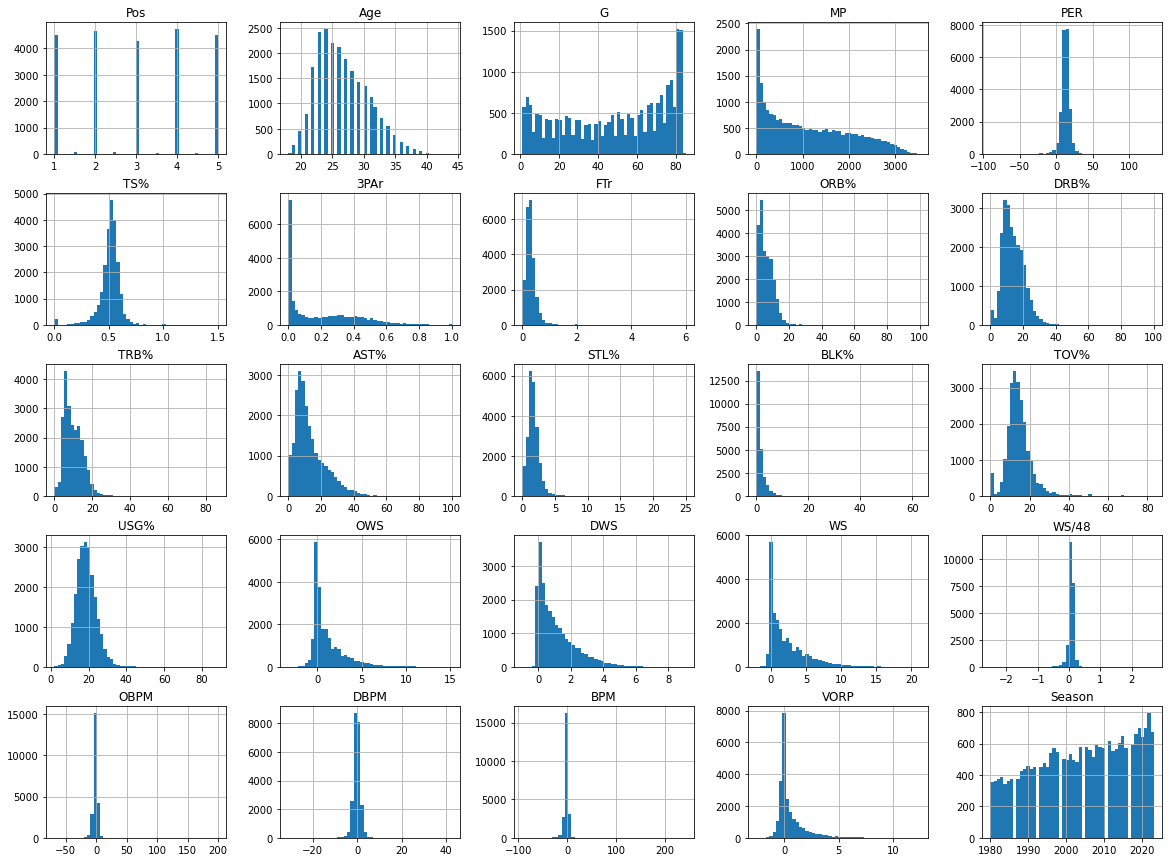

In [5]:
check_data_quality(df)

# prepairing the data 

In [6]:
df['Player'] = df['Player'].str.rstrip('*')
df_filtered = df[df['G'] > 20]

target_list = ['WS', 'PER']  # List of targets
df = df.groupby("Player").apply(lambda x: add_target(x, target_list))

# Supervised
Exploratory data analysis

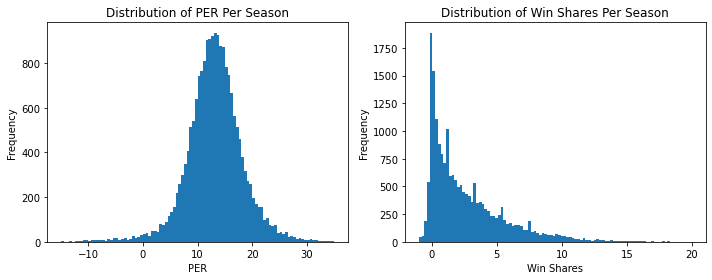

In [7]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for PER
axs[0].hist(df['PER'], bins=100, range=(-15, 35))
axs[0].set_title('Distribution of PER Per Season')
axs[0].set_xlabel('PER')
axs[0].set_ylabel('Frequency')

# Plot the histogram for Win Shares (WS)
axs[1].hist(df['WS'], bins=100, range=(-1, 20))
axs[1].set_title('Distribution of Win Shares Per Season')
axs[1].set_xlabel('Win Shares')
axs[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

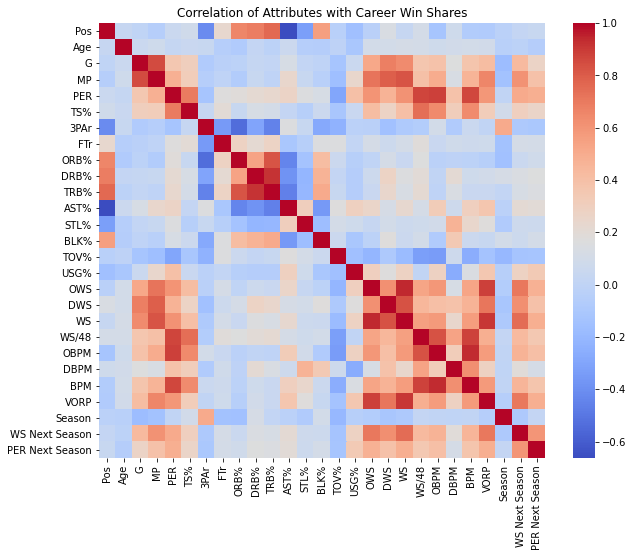

In [8]:
# Calculate the correlation matrix
correlation_matrix = df[df.columns.tolist()].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation of Attributes with Career Win Shares')
plt.show()

# start ML

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor

def generate_predictions(model, X):
    predictions = model.predict(X)
    return predictions

def evaluate_models(models, X, y, test_size=0.2, random_state=42):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model_name, model in models:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Generate predictions on the entire dataset
        predictions = generate_predictions(model, X_test)

        # Calculate evaluation metrics
        rmse = mean_squared_error(y_test, predictions, squared=False)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        # Store the results in a dictionary
        result = {
            'Model': model_name,
            'RMSE': rmse,
            'MAE': mae,
            'R2 Score': r2,
        }
        results.append(result)

    metrics_df = pd.DataFrame(results)
    return metrics_df

In [10]:
# Define the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('Huber Regression', HuberRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('XGBoost', xgb.XGBRegressor()),
    ('LightGBM', lgb.LGBMRegressor()),
    ('SVR', SVR()),
    ('MLP', MLPRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('CatBoost', CatBoostRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Extra Trees', ExtraTreesRegressor()),
    ('Kernel Ridge', KernelRidge())
]

removed_columns = ['Season', 'Player', 'Tm', 'OWS', 'WS Next Season', 'PER Next Season']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

X_WS = df[selected_columns].values
y_WS = df['WS Next Season'].values

X_PER = df[selected_columns].values
y_PER = df['PER Next Season'].values

In [11]:
# Call the method with your data
metrics_WS = evaluate_models(models, X_WS, y_WS)
metrics_PER = evaluate_models(models, X_PER, y_PER)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Learning rate set to 0.063197
0:	learn: 2.8484925	total: 168ms	remaining: 2m 48s
1:	learn: 2.7622356	total: 193ms	remaining: 1m 36s
2:	learn: 2.6846896	total: 220ms	remaining: 1m 13s
3:	learn: 2.6118539	total: 239ms	remaining: 59.5s
4:	learn: 2.5442147	total: 262ms	remaining: 52.1s
5:	learn: 2.4809858	total: 284ms	remaining: 47.1s
6:	learn: 2.4243508	total: 304ms	remaining: 43.1s
7:	learn: 2.3739902	total: 329ms	remaining: 40.9s
8:	learn: 2.3267160	total: 349ms	remaining: 38.5s
9:	learn: 2.2830356	total: 374ms	remaining: 37s
10:	learn: 2.2445347	total: 405ms	remaining: 36.4s
11:	learn: 2.2099640	total: 425ms	remaining: 35s
12:	learn: 2.1774125	total: 444ms	remaining: 33.7s
13:	learn: 2.1497964	total: 462ms	remaining: 32.5s
14:	learn: 2.1236920	total: 485ms	remaining: 31.8s
15:	learn: 2.0998762	total: 503ms	remaining: 30.9s
16:	learn: 2.0772253	total: 528ms	remaining: 30.5s
17:	learn: 2.0586796	total: 546ms	remaining: 29.8s
18:	learn: 2.0395226	total: 568ms	remaining: 29.4s
19:	learn: 2

174:	learn: 1.7569681	total: 2.31s	remaining: 10.9s
175:	learn: 1.7564541	total: 2.31s	remaining: 10.8s
176:	learn: 1.7559925	total: 2.33s	remaining: 10.8s
177:	learn: 1.7556351	total: 2.34s	remaining: 10.8s
178:	learn: 1.7548599	total: 2.35s	remaining: 10.8s
179:	learn: 1.7547477	total: 2.36s	remaining: 10.7s
180:	learn: 1.7542493	total: 2.37s	remaining: 10.7s
181:	learn: 1.7535364	total: 2.38s	remaining: 10.7s
182:	learn: 1.7530420	total: 2.39s	remaining: 10.7s
183:	learn: 1.7522843	total: 2.4s	remaining: 10.6s
184:	learn: 1.7516745	total: 2.41s	remaining: 10.6s
185:	learn: 1.7509371	total: 2.42s	remaining: 10.6s
186:	learn: 1.7505559	total: 2.43s	remaining: 10.6s
187:	learn: 1.7505143	total: 2.44s	remaining: 10.5s
188:	learn: 1.7498566	total: 2.45s	remaining: 10.5s
189:	learn: 1.7495057	total: 2.46s	remaining: 10.5s
190:	learn: 1.7486650	total: 2.47s	remaining: 10.5s
191:	learn: 1.7485496	total: 2.48s	remaining: 10.5s
192:	learn: 1.7481589	total: 2.5s	remaining: 10.5s
193:	learn: 1.

339:	learn: 1.6633846	total: 4.45s	remaining: 8.63s
340:	learn: 1.6629845	total: 4.46s	remaining: 8.62s
341:	learn: 1.6625582	total: 4.47s	remaining: 8.6s
342:	learn: 1.6619638	total: 4.48s	remaining: 8.58s
343:	learn: 1.6614447	total: 4.49s	remaining: 8.56s
344:	learn: 1.6607238	total: 4.5s	remaining: 8.54s
345:	learn: 1.6604797	total: 4.51s	remaining: 8.53s
346:	learn: 1.6599887	total: 4.52s	remaining: 8.51s
347:	learn: 1.6591866	total: 4.53s	remaining: 8.49s
348:	learn: 1.6582984	total: 4.54s	remaining: 8.47s
349:	learn: 1.6578678	total: 4.55s	remaining: 8.46s
350:	learn: 1.6573118	total: 4.57s	remaining: 8.44s
351:	learn: 1.6567599	total: 4.58s	remaining: 8.43s
352:	learn: 1.6562441	total: 4.59s	remaining: 8.41s
353:	learn: 1.6556613	total: 4.6s	remaining: 8.39s
354:	learn: 1.6552272	total: 4.61s	remaining: 8.38s
355:	learn: 1.6548337	total: 4.63s	remaining: 8.37s
356:	learn: 1.6547234	total: 4.64s	remaining: 8.35s
357:	learn: 1.6543365	total: 4.65s	remaining: 8.34s
358:	learn: 1.6

503:	learn: 1.5867013	total: 6.39s	remaining: 6.29s
504:	learn: 1.5861884	total: 6.4s	remaining: 6.27s
505:	learn: 1.5856063	total: 6.41s	remaining: 6.26s
506:	learn: 1.5852623	total: 6.42s	remaining: 6.25s
507:	learn: 1.5850213	total: 6.43s	remaining: 6.23s
508:	learn: 1.5846941	total: 6.45s	remaining: 6.22s
509:	learn: 1.5846113	total: 6.45s	remaining: 6.2s
510:	learn: 1.5841445	total: 6.46s	remaining: 6.18s
511:	learn: 1.5837386	total: 6.47s	remaining: 6.17s
512:	learn: 1.5833154	total: 6.48s	remaining: 6.15s
513:	learn: 1.5827187	total: 6.49s	remaining: 6.14s
514:	learn: 1.5822498	total: 6.5s	remaining: 6.12s
515:	learn: 1.5819494	total: 6.51s	remaining: 6.11s
516:	learn: 1.5815254	total: 6.53s	remaining: 6.1s
517:	learn: 1.5812344	total: 6.54s	remaining: 6.08s
518:	learn: 1.5806076	total: 6.55s	remaining: 6.07s
519:	learn: 1.5802778	total: 6.56s	remaining: 6.06s
520:	learn: 1.5799723	total: 6.57s	remaining: 6.04s
521:	learn: 1.5796078	total: 6.58s	remaining: 6.03s
522:	learn: 1.57

678:	learn: 1.5168668	total: 8.43s	remaining: 3.99s
679:	learn: 1.5168342	total: 8.44s	remaining: 3.97s
680:	learn: 1.5166568	total: 8.45s	remaining: 3.96s
681:	learn: 1.5163261	total: 8.46s	remaining: 3.95s
682:	learn: 1.5159175	total: 8.47s	remaining: 3.93s
683:	learn: 1.5155396	total: 8.49s	remaining: 3.92s
684:	learn: 1.5151512	total: 8.5s	remaining: 3.91s
685:	learn: 1.5146816	total: 8.51s	remaining: 3.9s
686:	learn: 1.5144289	total: 8.53s	remaining: 3.88s
687:	learn: 1.5140574	total: 8.54s	remaining: 3.87s
688:	learn: 1.5137740	total: 8.55s	remaining: 3.86s
689:	learn: 1.5132914	total: 8.56s	remaining: 3.85s
690:	learn: 1.5127440	total: 8.57s	remaining: 3.83s
691:	learn: 1.5124061	total: 8.6s	remaining: 3.83s
692:	learn: 1.5121719	total: 8.62s	remaining: 3.82s
693:	learn: 1.5116899	total: 8.63s	remaining: 3.8s
694:	learn: 1.5114107	total: 8.64s	remaining: 3.79s
695:	learn: 1.5110700	total: 8.65s	remaining: 3.78s
696:	learn: 1.5106561	total: 8.66s	remaining: 3.76s
697:	learn: 1.51

842:	learn: 1.4594087	total: 10.6s	remaining: 1.98s
843:	learn: 1.4589250	total: 10.6s	remaining: 1.96s
844:	learn: 1.4583949	total: 10.6s	remaining: 1.95s
845:	learn: 1.4581539	total: 10.6s	remaining: 1.94s
846:	learn: 1.4578421	total: 10.7s	remaining: 1.92s
847:	learn: 1.4576185	total: 10.7s	remaining: 1.91s
848:	learn: 1.4572224	total: 10.7s	remaining: 1.9s
849:	learn: 1.4570394	total: 10.7s	remaining: 1.89s
850:	learn: 1.4568397	total: 10.7s	remaining: 1.87s
851:	learn: 1.4565930	total: 10.7s	remaining: 1.86s
852:	learn: 1.4561830	total: 10.7s	remaining: 1.85s
853:	learn: 1.4558282	total: 10.7s	remaining: 1.83s
854:	learn: 1.4554810	total: 10.7s	remaining: 1.82s
855:	learn: 1.4552314	total: 10.8s	remaining: 1.81s
856:	learn: 1.4548612	total: 10.8s	remaining: 1.8s
857:	learn: 1.4543497	total: 10.8s	remaining: 1.78s
858:	learn: 1.4538813	total: 10.8s	remaining: 1.77s
859:	learn: 1.4538395	total: 10.8s	remaining: 1.76s
860:	learn: 1.4533636	total: 10.8s	remaining: 1.74s
861:	learn: 1.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Learning rate set to 0.063197
0:	learn: 5.8376285	total: 10.4ms	remaining: 10.4s
1:	learn: 5.7349383	total: 18.8ms	remaining: 9.39s
2:	learn: 5.6358497	total: 27.2ms	remaining: 9.05s
3:	learn: 5.5511497	total: 37.5ms	remaining: 9.35s
4:	learn: 5.4766179	total: 47.4ms	remaining: 9.44s
5:	learn: 5.4069050	total: 58.3ms	remaining: 9.65s
6:	learn: 5.3404976	total: 68.7ms	remaining: 9.75s
7:	learn: 5.2833624	total: 78.5ms	remaining: 9.73s
8:	learn: 5.2295570	total: 88.5ms	remaining: 9.74s
9:	learn: 5.1836253	total: 98.6ms	remaining: 9.76s
10:	learn: 5.1393023	total: 109ms	remaining: 9.76s
11:	learn: 5.1012316	total: 119ms	remaining: 9.77s
12:	learn: 5.0654293	total: 129ms	remaining: 9.76s
13:	learn: 5.0350102	total: 138ms	remaining: 9.75s
14:	learn: 5.0059561	total: 148ms	remaining: 9.7s
15:	learn: 4.9783337	total: 157ms	remaining: 9.68s
16:	learn: 4.9559186	total: 167ms	remaining: 9.67s
17:	learn: 4.9358025	total: 178ms	remaining: 9.71s
18:	learn: 4.9165774	total: 192ms	remaining: 9.92s
19

162:	learn: 4.4181953	total: 1.68s	remaining: 8.62s
163:	learn: 4.4153529	total: 1.69s	remaining: 8.6s
164:	learn: 4.4135869	total: 1.7s	remaining: 8.58s
165:	learn: 4.4117573	total: 1.71s	remaining: 8.57s
166:	learn: 4.4096316	total: 1.71s	remaining: 8.55s
167:	learn: 4.4086991	total: 1.72s	remaining: 8.54s
168:	learn: 4.4077355	total: 1.73s	remaining: 8.52s
169:	learn: 4.4058047	total: 1.74s	remaining: 8.51s
170:	learn: 4.4044503	total: 1.75s	remaining: 8.49s
171:	learn: 4.4036215	total: 1.76s	remaining: 8.48s
172:	learn: 4.4023074	total: 1.77s	remaining: 8.47s
173:	learn: 4.4010802	total: 1.78s	remaining: 8.45s
174:	learn: 4.3992521	total: 1.79s	remaining: 8.44s
175:	learn: 4.3959161	total: 1.8s	remaining: 8.42s
176:	learn: 4.3943631	total: 1.81s	remaining: 8.41s
177:	learn: 4.3919051	total: 1.82s	remaining: 8.4s
178:	learn: 4.3907408	total: 1.83s	remaining: 8.38s
179:	learn: 4.3890332	total: 1.84s	remaining: 8.37s
180:	learn: 4.3876274	total: 1.85s	remaining: 8.36s
181:	learn: 4.38

326:	learn: 4.1564409	total: 3.35s	remaining: 6.89s
327:	learn: 4.1548239	total: 3.36s	remaining: 6.88s
328:	learn: 4.1533108	total: 3.37s	remaining: 6.87s
329:	learn: 4.1529477	total: 3.38s	remaining: 6.85s
330:	learn: 4.1516627	total: 3.38s	remaining: 6.84s
331:	learn: 4.1509288	total: 3.4s	remaining: 6.83s
332:	learn: 4.1487523	total: 3.4s	remaining: 6.82s
333:	learn: 4.1473192	total: 3.41s	remaining: 6.81s
334:	learn: 4.1465489	total: 3.42s	remaining: 6.79s
335:	learn: 4.1460890	total: 3.43s	remaining: 6.78s
336:	learn: 4.1442739	total: 3.44s	remaining: 6.77s
337:	learn: 4.1434823	total: 3.45s	remaining: 6.76s
338:	learn: 4.1425951	total: 3.46s	remaining: 6.75s
339:	learn: 4.1418089	total: 3.47s	remaining: 6.74s
340:	learn: 4.1396768	total: 3.48s	remaining: 6.72s
341:	learn: 4.1374709	total: 3.49s	remaining: 6.71s
342:	learn: 4.1371872	total: 3.5s	remaining: 6.7s
343:	learn: 4.1342016	total: 3.51s	remaining: 6.69s
344:	learn: 4.1322619	total: 3.52s	remaining: 6.68s
345:	learn: 4.13

490:	learn: 3.9302310	total: 5.01s	remaining: 5.2s
491:	learn: 3.9290993	total: 5.03s	remaining: 5.19s
492:	learn: 3.9271084	total: 5.04s	remaining: 5.18s
493:	learn: 3.9253350	total: 5.04s	remaining: 5.17s
494:	learn: 3.9251753	total: 5.05s	remaining: 5.16s
495:	learn: 3.9246510	total: 5.06s	remaining: 5.14s
496:	learn: 3.9235834	total: 5.07s	remaining: 5.13s
497:	learn: 3.9228134	total: 5.08s	remaining: 5.12s
498:	learn: 3.9205394	total: 5.09s	remaining: 5.11s
499:	learn: 3.9188184	total: 5.1s	remaining: 5.1s
500:	learn: 3.9164810	total: 5.11s	remaining: 5.09s
501:	learn: 3.9155370	total: 5.12s	remaining: 5.08s
502:	learn: 3.9144478	total: 5.13s	remaining: 5.07s
503:	learn: 3.9134158	total: 5.14s	remaining: 5.06s
504:	learn: 3.9122276	total: 5.15s	remaining: 5.05s
505:	learn: 3.9108233	total: 5.16s	remaining: 5.04s
506:	learn: 3.9103616	total: 5.17s	remaining: 5.02s
507:	learn: 3.9091227	total: 5.18s	remaining: 5.01s
508:	learn: 3.9074289	total: 5.19s	remaining: 5s
509:	learn: 3.9064

661:	learn: 3.7445201	total: 6.88s	remaining: 3.51s
662:	learn: 3.7435774	total: 6.89s	remaining: 3.5s
663:	learn: 3.7429302	total: 6.9s	remaining: 3.49s
664:	learn: 3.7418555	total: 6.91s	remaining: 3.48s
665:	learn: 3.7407756	total: 6.92s	remaining: 3.47s
666:	learn: 3.7398620	total: 6.93s	remaining: 3.46s
667:	learn: 3.7388876	total: 6.94s	remaining: 3.45s
668:	learn: 3.7379392	total: 6.95s	remaining: 3.44s
669:	learn: 3.7373287	total: 6.96s	remaining: 3.43s
670:	learn: 3.7362375	total: 6.97s	remaining: 3.42s
671:	learn: 3.7361328	total: 6.98s	remaining: 3.41s
672:	learn: 3.7341470	total: 6.99s	remaining: 3.4s
673:	learn: 3.7329930	total: 7s	remaining: 3.38s
674:	learn: 3.7323457	total: 7.01s	remaining: 3.37s
675:	learn: 3.7313994	total: 7.02s	remaining: 3.36s
676:	learn: 3.7302668	total: 7.03s	remaining: 3.35s
677:	learn: 3.7287545	total: 7.04s	remaining: 3.34s
678:	learn: 3.7285721	total: 7.05s	remaining: 3.33s
679:	learn: 3.7274630	total: 7.06s	remaining: 3.32s
680:	learn: 3.7265

826:	learn: 3.5843377	total: 8.54s	remaining: 1.79s
827:	learn: 3.5836398	total: 8.55s	remaining: 1.78s
828:	learn: 3.5823685	total: 8.56s	remaining: 1.77s
829:	learn: 3.5814011	total: 8.57s	remaining: 1.76s
830:	learn: 3.5809826	total: 8.58s	remaining: 1.75s
831:	learn: 3.5795929	total: 8.59s	remaining: 1.73s
832:	learn: 3.5790795	total: 8.6s	remaining: 1.72s
833:	learn: 3.5783463	total: 8.61s	remaining: 1.71s
834:	learn: 3.5776648	total: 8.62s	remaining: 1.7s
835:	learn: 3.5755567	total: 8.63s	remaining: 1.69s
836:	learn: 3.5753741	total: 8.64s	remaining: 1.68s
837:	learn: 3.5752462	total: 8.65s	remaining: 1.67s
838:	learn: 3.5748191	total: 8.66s	remaining: 1.66s
839:	learn: 3.5740965	total: 8.67s	remaining: 1.65s
840:	learn: 3.5732705	total: 8.68s	remaining: 1.64s
841:	learn: 3.5723678	total: 8.69s	remaining: 1.63s
842:	learn: 3.5722178	total: 8.7s	remaining: 1.62s
843:	learn: 3.5715645	total: 8.71s	remaining: 1.61s
844:	learn: 3.5701930	total: 8.71s	remaining: 1.6s
845:	learn: 3.56

987:	learn: 3.4497772	total: 10.2s	remaining: 124ms
988:	learn: 3.4491507	total: 10.2s	remaining: 114ms
989:	learn: 3.4488957	total: 10.2s	remaining: 103ms
990:	learn: 3.4484355	total: 10.3s	remaining: 93.1ms
991:	learn: 3.4473049	total: 10.3s	remaining: 82.8ms
992:	learn: 3.4462858	total: 10.3s	remaining: 72.4ms
993:	learn: 3.4458228	total: 10.3s	remaining: 62.1ms
994:	learn: 3.4454631	total: 10.3s	remaining: 51.7ms
995:	learn: 3.4438372	total: 10.3s	remaining: 41.4ms
996:	learn: 3.4431856	total: 10.3s	remaining: 31ms
997:	learn: 3.4422584	total: 10.3s	remaining: 20.7ms
998:	learn: 3.4411794	total: 10.3s	remaining: 10.3ms
999:	learn: 3.4401737	total: 10.3s	remaining: 0us


In [12]:
metrics_WS

,Model,RMSE,MAE,R2 Score
0,Linear Regression,1.921731,1.403846,0.581321
1,Ridge Regression,1.921626,1.403658,0.581367
2,Lasso Regression,2.041754,1.483711,0.527391
3,ElasticNet,1.982578,1.446233,0.554389
4,Huber Regression,1.963130,1.405007,0.563088
5,Random Forest,1.918365,1.393675,0.582787
6,Gradient Boosting,1.892462,1.368540,0.593978
7,XGBoost,1.965590,1.407515,0.561992
8,LightGBM,1.898205,1.370044,0.591510
9,SVR,2.320066,1.561361,0.389766


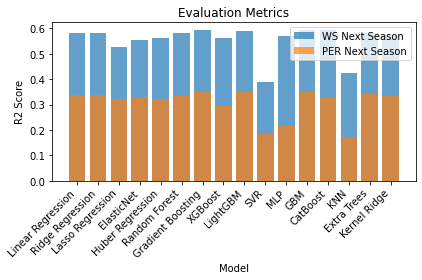

In [13]:
# Plot the evaluation metrics for WS Next Season
plt.bar(metrics_WS['Model'], metrics_WS['R2 Score'], label='WS Next Season', alpha=0.7)

# Plot the evaluation metrics for PER Next Season
plt.bar(metrics_PER['Model'], metrics_PER['R2 Score'], label='PER Next Season', alpha=0.7)

# Add a horizontal line to separate the two sets of metrics
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Evaluation Metrics')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
df_sorted_WS = metrics_WS.sort_values(by='R2 Score')
df_sorted_PER = metrics_PER.sort_values(by='R2 Score')
df_sorted_WS.tail(5)

,Model,RMSE,MAE,R2 Score
14,Extra Trees,1.917097,1.391187,0.583338
8,LightGBM,1.898205,1.370044,0.591510
11,GBM,1.892975,1.369075,0.593757
6,Gradient Boosting,1.892462,1.368540,0.593978
12,CatBoost,1.892055,1.358850,0.594152


In [15]:
df_sorted_PER.tail(5)

,Model,RMSE,MAE,R2 Score
1,Ridge Regression,4.982761,2.982893,0.337994
14,Extra Trees,4.968867,3.000065,0.341681
8,LightGBM,4.940470,2.949001,0.349184
11,GBM,4.933580,2.930823,0.350998
6,Gradient Boosting,4.931183,2.929814,0.351628


# Choose the 'Gradient Boosting' model

In [16]:
# Split data for WS model
X_train_WS, X_test_WS, y_train_WS, y_test_WS = train_test_split(X_WS, y_WS, test_size=0.2)

# Train WS model
extra_trees_WS = GradientBoostingRegressor()
extra_trees_WS.fit(X_train_WS, y_train_WS)

# Make predictions for WS
predictions_WS = extra_trees_WS.predict(X_test_WS)

In [17]:
# Split data for PER model
X_train_PER, X_test_PER, y_train_PER, y_test_PER = train_test_split(X_PER, y_PER, test_size=0.2)

# Train PER model
extra_trees_PER = GradientBoostingRegressor()
extra_trees_PER.fit(X_train_PER, y_train_PER)

# Make predictions for PER
predictions_PER = extra_trees_PER.predict(X_test_PER)

In [20]:
# Create DataFrame for WS predictions
df_test = pd.DataFrame(X_test_WS, columns=selected_columns)


# Reset index of df
df.reset_index(drop=True, inplace=True)

# Add the removed columns to df_test_WS
for column in removed_columns:
    df_test[column] = df[column]

df_test['WS Next Season'] = y_test_WS
df_test['PER Next Season'] = y_test_PER

df_test['WS_Prediction'] = predictions_WS
df_test['PER_Prediction'] = predictions_PER

In [21]:
importances_WS = extra_trees_WS.feature_importances_
feature_importance_df_WS = pd.DataFrame({'Feature': selected_columns, 'Importance': importances_WS})
feature_importance_df_WS = feature_importance_df_WS.sort_values(by='Importance', ascending=False)

importances_PER = extra_trees_PER.feature_importances_
feature_importance_df_PER = pd.DataFrame({'Feature': selected_columns, 'Importance': importances_PER})
feature_importance_df_PER = feature_importance_df_PER.sort_values(by='Importance', ascending=False)

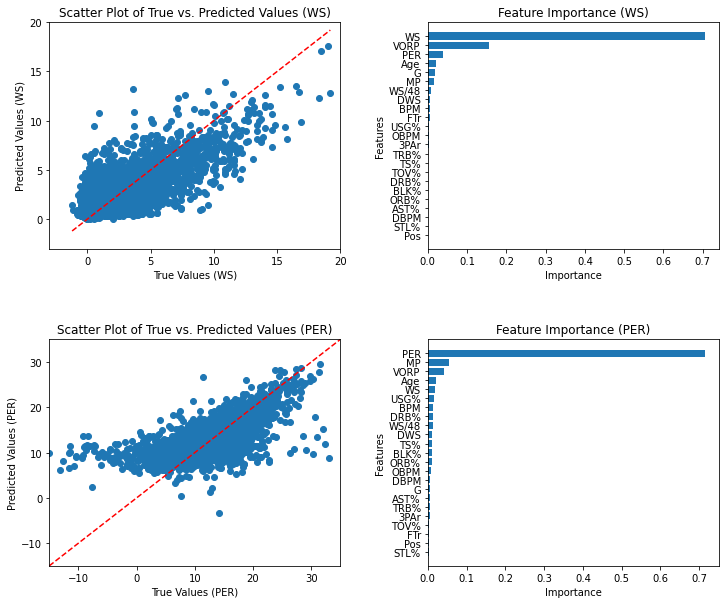

In [22]:
# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of True vs. Predicted Values for WS
ax1.scatter(y_test_WS, predictions_WS)
ax1.plot([min(y_test_WS), max(y_test_WS)], [min(y_test_WS), max(y_test_WS)], color='red', linestyle='--')
ax1.set_xlabel('True Values (WS)')
ax1.set_ylabel('Predicted Values (WS)')
ax1.set_title('Scatter Plot of True vs. Predicted Values (WS)')
ax1.set_xlim(-3, 20)  # Adjust x-axis limits
ax1.set_ylim(-3, 20)  # Adjust y-axis limits

# Bar plot of Feature Importance for WS
ax2.barh(feature_importance_df_WS['Feature'], feature_importance_df_WS['Importance'])
ax2.set_xlabel('Importance')
ax2.set_ylabel('Features')
ax2.set_title('Feature Importance (WS)')
ax2.invert_yaxis()  # Invert the y-axis to display features from top to bottom

# Scatter plot of True vs. Predicted Values for PER
ax3.scatter(y_test_PER, predictions_PER)
ax3.plot([min(y_test_PER), max(y_test_PER)], [min(y_test_PER), max(y_test_PER)], color='red', linestyle='--')
ax3.set_xlabel('True Values (PER)')
ax3.set_ylabel('Predicted Values (PER)')
ax3.set_title('Scatter Plot of True vs. Predicted Values (PER)')
ax3.set_xlim(-15, 35)  # Adjust x-axis limits
ax3.set_ylim(-15, 35)  # Adjust y-axis limits

# Bar plot of Feature Importance for PER
ax4.barh(feature_importance_df_PER['Feature'], feature_importance_df_PER['Importance'])
ax4.set_xlabel('Importance')
ax4.set_ylabel('Features')
ax4.set_title('Feature Importance (PER)')
ax4.invert_yaxis()  # Invert the y-axis to display features from top to bottom

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Display the figure
plt.show()

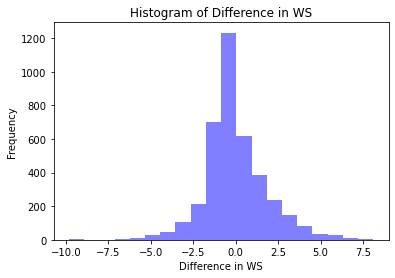

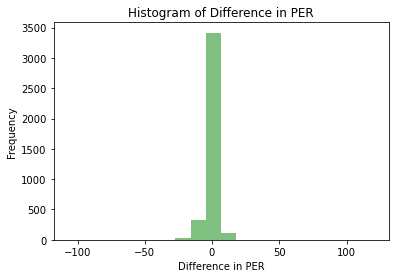

In [23]:
df_test['diff_WS'] = df_test['WS Next Season'] - df_test['WS_Prediction']
df_test['diff_PER'] = df_test['PER Next Season'] - df_test['PER_Prediction']

# Create histograms for the differences
plt.hist(df_test['diff_WS'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Difference in WS')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in WS')
plt.show()

plt.hist(df_test['diff_PER'], bins=20, color='green', alpha=0.5)
plt.xlabel('Difference in PER')
plt.ylabel('Frequency')
plt.title('Histogram of Difference in PER')
plt.show()

In [24]:
df_test

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Season,Player,Tm,OWS,WS Next Season,PER Next Season,WS_Prediction,PER_Prediction,diff_WS,diff_PER
0,1.0,27.0,72.0,1334.0,14.1,0.572,0.154,0.456,0.6,7.8,4.4,16.0,1.4,0.3,10.7,19.6,1.2,3.7,0.132,-0.9,0.3,-0.6,0.5,1986,A.C. Green,LAL,1.4,3.7,14.6,2.588002,8.879636,1.111998,5.720364
1,3.0,27.0,51.0,1386.0,13.2,0.493,0.005,0.276,5.2,11.0,8.0,9.4,1.4,0.7,10.1,22.2,1.2,1.9,0.067,-1.5,-1.0,-2.5,-0.2,1987,A.C. Green,LAL,4.3,2.8,5.8,1.817796,8.622185,0.982204,-2.822185
2,4.0,27.0,75.0,2081.0,13.6,0.512,0.003,0.227,7.8,13.6,10.9,10.1,1.1,1.7,15.0,22.7,2.8,3.7,0.085,-1.9,0.1,-1.8,0.1,1988,A.C. Green,LAL,4.5,0.3,18.6,2.504623,15.163049,-2.204623,3.436951
3,2.0,26.0,66.0,918.0,8.8,0.448,0.072,0.184,4.2,9.3,6.8,13.9,2.2,0.3,15.7,16.6,1.3,0.7,0.037,-3.5,0.9,-2.5,-0.1,1989,A.C. Green,LAL,5.8,2.9,10.5,1.002961,11.054193,1.897039,-0.554193
4,4.0,26.0,75.0,982.0,16.2,0.482,0.015,0.378,19.9,27.5,23.7,6.1,1.4,2.3,13.5,19.5,1.6,2.1,0.102,-1.8,-1.2,-3.0,-0.3,1990,A.C. Green,LAL,4.4,3.8,16.9,2.145304,15.415347,1.654696,1.484653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896,1.0,23.0,19.0,87.0,13.3,0.542,0.267,0.800,1.5,13.1,7.7,24.4,3.2,0.0,25.7,30.0,0.1,0.1,0.069,-4.5,0.5,-4.0,0.0,2017,Damian Lillard,POR,8.8,0.4,10.1,0.734730,10.251275,-0.334730,-0.151275
3897,5.0,28.0,78.0,1471.0,15.5,0.607,0.003,0.380,13.7,28.8,21.3,3.9,1.1,2.9,16.2,12.1,2.5,5.0,0.164,-1.2,0.6,-0.6,0.5,2018,Damian Lillard,POR,9.9,5.7,15.4,3.880945,8.409377,1.819055,6.990623
3898,5.0,27.0,61.0,2075.0,22.8,0.520,0.004,0.169,7.3,25.3,16.2,12.1,1.2,3.9,5.2,25.7,2.5,7.5,0.173,3.5,0.2,3.7,3.0,2019,Damian Lillard,POR,9.7,7.7,8.5,7.173714,9.463250,0.526286,-0.963250
3899,4.0,22.0,62.0,1892.0,18.4,0.588,0.048,0.389,7.9,18.1,13.1,7.1,1.3,2.4,12.5,21.7,2.9,6.4,0.163,0.7,0.6,1.3,1.6,2020,Damian Lillard,POR,10.9,7.6,14.9,6.331847,12.502664,1.268153,2.397336


In [36]:
from sklearn.metrics.pairwise import euclidean_distances

# Calculate the similarity scores based on Euclidean distance
predictions = df_test[['WS_Prediction', 'PER_Prediction']]
similarity_matrix = euclidean_distances(predictions, predictions)

# Get the indices of similar players for each player
similar_players_indices = np.argsort(similarity_matrix, axis=1)[:, 1:]

# Create columns for similar players and similarity scores
df_test['Similar Players'] = df_test.apply(lambda row: df_test.loc[similar_players_indices[row.name][0], 'Player'], axis=1)
df_test['Similarity'] = np.min(similarity_matrix, axis=1)

In [39]:
selected_columns = ['Player','Season', 'WS_Prediction','PER_Prediction']

df2 = df_test[selected_columns].copy()
df2[df2['Player']=='Deni Avdija']

,Player,Season,WS_Prediction,PER_Prediction


In [1]:
selected_columns = ['Player','Season','WS','WS Next Season', 'WS_Prediction','PER','PER Next Season', 'PER_Prediction', 'Similar Players']
selected_players = ['Kareem Abdul-Jabbar', 'Trae Young', 'Marvin Bagley III', 'Jayson Tatum', 'LeBron James', 
                    'Michael Jordan','Ben Simmons']

df1 = df_test[selected_columns].copy()
best_players = df1.loc[df1['Player'].isin(selected_players)]
best_players

NameError: name 'df_test' is not defined